# Newton-Raphson for equations
Find the solution for  
\begin{eqnarray}
x_{1}^2+x_{1}x_{2}=10\\
x_{2}+3x_{1}x_{2}^2=57
\end{eqnarray}



### Numerical Solutions
\begin{equation}
f_{i}(x_{1},x_{2},...,x_{N})=0, \qquad i=1,2,....,N
\end{equation}

\begin{equation}
{\bf f(y)}=\left[ \begin{array}{c} f_{1}(\bf{y}) \\ f_{2}(\bf{y})  \end{array}\right] = \left[ \begin{array}{c} x_{1}^2+x_{1}x_{2}-10 \\ x_{2}+3x_{1}x_{2}^2-57 \end{array}\right] =0 
\end{equation}

Make a guess ($x_{1},x_{2}$), and then correct it ($\Delta x_{1},\Delta x_{2}$), we have
\begin{equation}
f_{i}(x_{1}+\Delta x_{1}, x_{2}+\Delta x_{2})=0 \qquad i=1,2,3,...,N
\end{equation}
We can expand it using Taylor series
\begin{equation}
f_{i}(x_{1}+\Delta x_{1}, x_{2}+\Delta x_{2})\simeq f_{i}(x_{1},x_{2})+\frac{\partial f_{i}}{\partial x_{1}}\Delta x_{1}+\frac{\partial f_{i}}{\partial x_{2}}\Delta x_{2}=0 \qquad i=1,2,3,...,N
\end{equation}

\begin{equation}
\left[ \begin{array}{c} f_{1}\\ f_{2} \end{array}\right] + \begin{bmatrix} \partial f_{1}/\partial x_{1} & \partial f_{1}/\partial x_{2}  \\ \partial f_{2}/\partial x_{1} & \partial f_{2}/\partial x_{2} \end{bmatrix}\left[ \begin{array}{c} \Delta x_{1} \\ \Delta x_{2}  \end{array}\right] =0 
\end{equation}

So we want to solve the matrix equation
\begin{equation}
F'\Delta {\bf{x}}=-\bf{f}
\end{equation}
Here we use bold font for a vector, the captal letter to represent a matrix therefore we have to solve for $\Delta x$:

\begin{equation}
\Delta {\bf{x}}=-\bf{f}* F'^{-1}
\end{equation}
Therefore with the $\Delta x$ found, the initial guesses can be adjusted:
$$x_{1} =x_{1} + \Delta x_1 $$
$$x_{2} =x_{2} + \Delta x_2 $$

### Lazar Novakovic Homework #4 
 
This assignment was completed together with fellow students Faraz, and Daniel.



### Function definition 
First we define our functions:

In [1]:
%matplotlib notebook
import numpy as np



def f1(x1,x2):
    return x1**2 + x1*x2-10

def f2(x1,x2):
    return x2 + 3*x1*(x2**2)-57


### Function Graphs
These simply take in values for x1 and x2. for f1 = 0, and f2 = 0, these are the original equations.
The difference between the two equations f2- f1 or f1 - f2 plotted as a function f3 will allow us to find a solution for x1 and x2. This will yield an x1 and x2 that is 0 for both f1 and f2.


In [2]:

# These are the ranges for the x inputs which will be checked for optimization. 
x1t = np.arange(-3,5,0.5)
x2t = np.arange(-3,5,0.5)

# Creating the meshgrid for the 3D plot, as these are 2 input functions, (f1 and f2 that is).
x1t, x2t = np.meshgrid(x1t, x2t)
Z1 = f1(x1t,x2t)
Z2 = f2(x1t,x2t)

# This is the difference plot.
Z3 = Z2 - Z1

The range for x1t and x2t may seem odd. Previously, the values for the x1 ranges were between -10 and 10 with a step size of 0.1, however after optimization this range included far too many useless points. The same process would follow if you were to use -10 to 10 0.1.


<IPython.core.display.Javascript object>


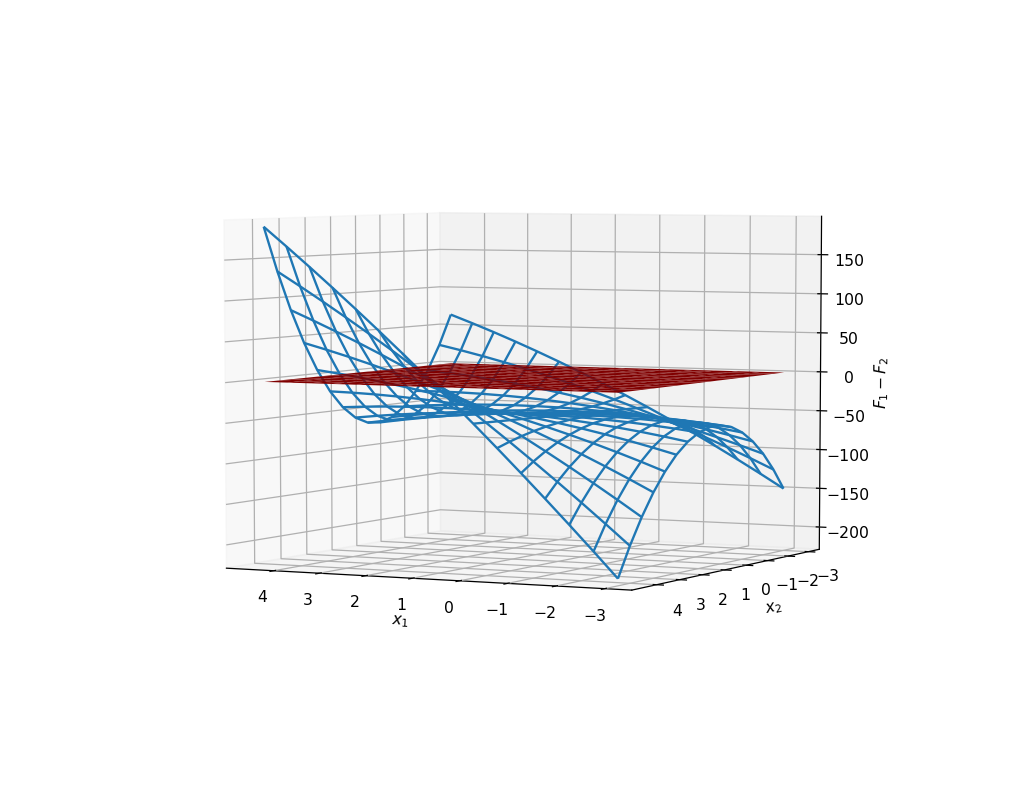

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

Z0=0*x1t+0*x2t    # This is just the Z0 = 0 plane. I had to write this as variable dependent for the output to work.


Axes3D.plot_wireframe(ax,x1t, x2t, Z3)
Axes3D.plot_surface(ax,x1t, x2t, Z0,color="red")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$F_1-F_2$')
ax.view_init(elev=5 ,azim=135)

The fields move through the positive- negative axis. The Z = 0 field was plotted to see x1 x2 values which intersect.

#### Graph Analysis
As we can see, there seems to be 2 sets of anwsers for this system of equations, depending on our first random guess, either one of these anwsers can be viable.

$$(x_1,x_2) = (2,3) $$


$$(x_1,x_2) = (4.394,-2.118) $$

### Newton Raphson coding for solving equations
Since we can anaylitically find the partial derivatives for our jacobian matrix, we do so:
\begin{equation}
\begin{bmatrix} \partial f_{1}/\partial x_{1} & \partial f_{1}/\partial x_{2}  \\ \partial f_{2}/\partial x_{1} & \partial f_{2}/\partial x_{2} \end{bmatrix}=
\begin{bmatrix} 2x_1+x_2 & x_1  \\ 3x_2 ^ {2} & 1+6x_1x_2 \end{bmatrix}
\end{equation}
We aim to solve:
\begin{equation}
\Delta {\bf{x}}=-\bf{f}* F'^{-1}
\end{equation}

In [4]:
def newtonraphson(x10,x20, Nmax, eps,f1):

    for i in range(0,Nmax):

        df = np.array([[2*x10+x20,x10],[3*x20**2,1+6*x10*x20]])  #these are the analytical derivatives 
        negf = np.array([-f1(x10,x20),-f2(x10,x20)]) #This is the negatice of our matrix function


        dfinv = np.linalg.inv(df)  # this is inverse of our jacobian(derivative) function
        
        xs1 = np.dot(negf,dfinv)  #this dot product results in our delta-x matrix
        
        x10 = x10 + xs1[0]
        x20 = x20 + xs1[1]

        if(abs(f1(x10,x20))<eps):
            print("Root is at {0:.5f} and {1:.5f} after {2:.2f} iterations, with a precision of {3:.15f} with a function value of {4:.15f}.".format(x10,x20,i,eps,f1(x10,x20)))
            return
            break
    
            
    return [x10,x20,f1(x10,x20)]

In [5]:
newtonraphson(1,1,500,10**(-13),f1)

Root is at 4.39374 and -2.11778 after 68.00 iterations, with a precision of 0.000000000000100 with a function value of -0.000000000000060.


We seem to have found one set of the anwsers but lets search for the other:

In [6]:
def newtonraphson(x10,x20, Nmax, eps,f1):

    for i in range(0,Nmax):

        df = np.array([[2*x10+x20,x10],[3*x20**2,1+6*x10*x20]])  #these are the analytical derivatives 
        negf = np.array([-f1(x10,x20),-f2(x10,x20)]) #This is the negatice of our matrix function


        dfinv = np.linalg.inv(df)  # this is inverse of our jacobian(derivative) function
        
        xs1 = np.dot(negf,dfinv)  #this dot product results in our delta-x matrix
        
        x10 = x10 + xs1[0]
        x20 = x20 + xs1[1]

        if(abs(f1(x10,x20))<eps):
            #print("Root is at {0:.5f} and {1:.5f} after {2:.2f} iterations, with a precision of {3:.15f} with a function value of {4:.15f}.".format(x10,x20,i,eps,f1(x10,x20)))
            return [x10,x20,f1(x10,x20)]
            break
    
            
    return [0,0,0]

In [7]:
import random 
for i in np.arange(0,5,0.1):
    for j in np.arange(-3,4,0.1):
        xT=newtonraphson(i,j,300,10**(-5),f1)
        if(2.1>xT[0]>1.9 and 2.9<xT[1]<3.1):
            print(xT)
            print("Starting guess:",i,"and",j)

[2.0000000000000244, 2.9999999999999987, 1.6697754290362354e-13]
Starting guess: 2.0 and 3.0000000000000053


As we can see, only 1 guess from the ranges [-5,5] results in the other set of anwsers being (2,3) meaning the code is highly functioned to stear towards one anwser. lets try to fix this. 

This code has steps which overshoot and never reach the 2,3 solution for x1, x2, unless the initial values are really close already. In order to try and provide both solutions we can try to implement backtracking aswell. This will continue to decrease the stepsize if the magnitude is still larger after the adjustment.

### Newton Raphson BackTracking

In [8]:
  def newtonraphson2(x10,x20, Nmax, eps,f1):

    for i in range(0,Nmax):

        df = np.array([[2*x10+x20,x10],[3*x20**2,1+6*x10*x20]])  
        negf = np.array([-f1(x10,x20),-f2(x10,x20)])
        
        dfinv = np.linalg.inv(df)

        xs1 = np.dot(negf,dfinv)
        
        while (abs(f1(x10+xs1[0],x20+xs1[1]))>abs(f1(x10,x20))): ## This is the backtracking implementation.
            xs1=xs1/2
        x10 = x10 + xs1[0]
        x20 = x20 + xs1[1]

        if(abs(f1(x10,x20))<eps):
            #print("Root is at",x10,x20," after ",i," iterations, with a precision of ",abs(f1(x10,x20)),f2(x10,x20))
            # uncomment this for specific details when machine precision is reached
            return [x10,x20,f1(x10,x20)]
            break
            
    return [x10,x20,f1(x10,x20)]


As you can see below several more values yield the more sensitive solution.

In [9]:
import random 
for i in np.arange(0,5,0.1):
    for j in np.arange(-3,4,0.1):
        xT=newtonraphson2(i,j,300,10**(-5),f1)
        if(2.1>xT[0]>1.9 and 2.9<xT[1]<3.1):
            print(xT)
            print("Starting guess:",i,"and",j)
            print('\n')

[1.9000000000000001, 2.9000000000000057, -0.8799999999999883]
Starting guess: 1.9000000000000001 and 2.9000000000000057


[1.9000000000000001, 3.0000000000000053, -0.6899999999999888]
Starting guess: 1.9000000000000001 and 3.0000000000000053


[2.0108693466823957, 3.082136715500923, 0.24136977291205142]
Starting guess: 1.9000000000000001 and 3.100000000000005


[2.0, 2.9000000000000057, -0.19999999999998863]
Starting guess: 2.0 and 2.9000000000000057


[2.0, 3.0000000000000053, 1.0658141036401503e-14]
Starting guess: 2.0 and 3.0000000000000053


[1.9900686252932671, 2.921027061451365, -0.2265825579964158]
Starting guess: 2.1 and 2.9000000000000057


[2.013116483465133, 3.0685648738061757, 0.23001650404034102]
Starting guess: 3.6 and 1.1000000000000032


[1.9954818677368336, 3.0226598621441245, 0.013610831710998639]
Starting guess: 3.7 and 1.1000000000000032


[1.998165741113023, 2.977928197610577, -0.056939567082336495]
Starting guess: 3.8000000000000003 and 1.1000000000000032


[1.949

### Newton Raphson Back tracking Analysis

As we can see, with the back tracking method, we get more of the second result with the same set of initial guesses. The downside to the backtracking method is more computing power and time consumption to run the 2 for loops but if one wants to make a educated guess based on the graph, this algorithm proves better. Introducing an extra while loop nested in a for loop which can be triggered for a long time if the magnitude does not decrease for several steps will increase computational time significantly.

In [11]:
  def newtonraphson3(x10,x20, Nmax, eps,f1):

    for i in range(0,Nmax):

        df = np.array([[2*x10+x20,x10],[3*x20**2,1+6*x10*x20]])  
        negf = np.array([-f1(x10,x20),-f2(x10,x20)])
        
        dfinv = np.linalg.inv(df)

        xs1 = np.dot(negf,dfinv)
        
        while (abs(f1(x10+xs1[0],x20+xs1[1]))>abs(f1(x10,x20))): ## This is the backtracking implementation.
            xs1=xs1/4
        x10 = x10 + xs1[0]
        x20 = x20 + xs1[1]

        if(abs(f1(x10,x20))<eps):
            print("Root is at",x10,x20," after ",i," iterations, with a precision of ",abs(f1(x10,x20)),f2(x10,x20))
            # comment this for no specific details when machine precision is reached
            return [x10,x20,f1(x10,x20)]
            break
            
    return [x10,x20,f1(x10,x20)]


In [ ]:
for i in np.arange(0,5,0.1):
    for j in np.arange(-3,4,0.1):
        xT=newtonraphson3(i,j,300,10**(-5),f1)
        if(2.1>xT[0]>1.9 and 2.9<xT[1]<3.1):
            print(xT)
            print("Starting guess:",i,"and",j)
            print('\n')

Root is at 4.393742864456736 -2.1177807195817393  after  23  iterations, with a precision of  7.566181833951191e-06 -3.40615030793856e-05
Root is at 4.393743049467519 -2.117780760658411  after  24  iterations, with a precision of  6.512694797677909e-06 -2.9319955594075964e-05
Root is at 4.393743056564767 -2.117780762223108  after  23  iterations, with a precision of  6.472233121002091e-06 -2.913867003684345e-05
Root is at 4.393745356393316 -2.1177812730824686  after  22  iterations, with a precision of  6.622365004815833e-06 2.9815880708383702e-05
Root is at 4.393745813395852 -2.117781374570486  after  23  iterations, with a precision of  9.22452679219532e-06 4.1529430063746986e-05
Root is at 4.393742998665081 -2.117780749375686  after  23  iterations, with a precision of  6.801958690516585e-06 -3.062213244220402e-05
Root is at -4.650936687755659 2.500831488159042  after  6  iterations, with a precision of  3.1553381134585834e-06 -141.7622490356144
Root is at 4.393745706468652 -2.11778

Root is at 4.393745679386729 -2.117781344818114  after  23  iterations, with a precision of  8.461449146679456e-06 3.809501689033823e-05
Root is at 4.393745547559583 -2.117781315527519  after  23  iterations, with a precision of  7.710895742363277e-06 3.4715281529429376e-05
Root is at 4.393743061001897 -2.1177807632345766  after  23  iterations, with a precision of  6.447082904870172e-06 -2.9023509782177825e-05
Root is at 4.393743028018563 -2.1177807558990023  after  23  iterations, with a precision of  6.634841392738622e-06 -2.9869508942681477e-05
Root is at 4.393742993921799 -2.1177807483185593  after  23  iterations, with a precision of  6.82895024262109e-06 -3.074391540280885e-05
Root is at 4.393742956258367 -2.117780739947957  after  23  iterations, with a precision of  7.043375951809594e-06 -3.170963569232299e-05
Root is at 4.393742913827306 -2.1177807305201006  after  23  iterations, with a precision of  7.284955042763386e-06 -3.2797473473067384e-05
Root is at 4.393742866574253 

[1.993297581519169, 2.9001601242474453, -0.2458825898290673]
Starting guess: 2.2 and 2.9000000000000057


Root is at 4.4131724015622416 -2.1472301854194655  after  6  iterations, with a precision of  6.348183918092332e-06 1.8948543316280322
Root is at 4.393745724117753 -2.117781354760859  after  21  iterations, with a precision of  8.716106213668695e-06 3.924203279126459e-05
Root is at 4.393745938970875 -2.1177814024680157  after  21  iterations, with a precision of  9.939501170563858e-06 4.474866167214486e-05
Root is at 4.39374311886726 -2.1177807760619327  after  22  iterations, with a precision of  6.1174980849898475e-06 -2.7541609377124132e-05
Root is at 4.393743132545398 -2.117780779112019  after  23  iterations, with a precision of  6.039670227053762e-06 -2.719033425080397e-05
Root is at 4.393745176937617 -2.117781233205319  after  24  iterations, with a precision of  5.600657701165801e-06 2.5214843603293957e-05
Root is at 4.39374581663921 -2.117781375333895  after  21  iteration

Root is at 4.393745917266752 -2.1177813976654023  after  23  iterations, with a precision of  9.81584241621647e-06 4.419330571892033e-05
Root is at 4.39374532626945 -2.1177812663833087  after  22  iterations, with a precision of  6.450881974373601e-06 2.9043249718085917e-05
Root is at 4.393745302880735 -2.1177812611813187  after  22  iterations, with a precision of  6.317742261785497e-06 2.8443329888716562e-05
Root is at 4.393745284753621 -2.117781257150456  after  22  iterations, with a precision of  6.214550264616037e-06 2.797841771240428e-05
Root is at 4.393743177930289 -2.1177807891897444  after  22  iterations, with a precision of  5.781245308256189e-06 -2.602712041976929e-05
Root is at 4.393743127759753 -2.117780778039526  after  22  iterations, with a precision of  6.066876814259103e-06 -2.7313529749051213e-05
Root is at 4.393745327492618 -2.1177812666325613  after  22  iterations, with a precision of  6.457944996540732e-06 2.907337395186005e-05


Decreasing the stepsize even more does decrease computational time for several steps which are stuck in while loop for a long time.
